In [1]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
%pylab inline

sns.set_context('poster')

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Load data
data = pd.read_csv('Interests Survey.csv')

# Clean data
from string import punctuation

data.columns = data.columns.str.strip().str.lower()

for i in list(punctuation):
    data.columns = data.columns.str.replace(i, '')

data.columns = data.columns.str.replace(" ", '_')

data = data[data.check_here_if_you_dont_want_to_make_new_friends != "I don't want to participate. Thanks anyway!"]

In [3]:
data['niceness'] = data.i_make_sure_others_feel_welcome + data.i_sympathize_with_others_feelings

del data['i_make_sure_others_feel_welcome']
del data['i_sympathize_with_others_feelings']

In [4]:
X = data.select_dtypes(include=[np.number]).values

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np





For n_clusters = 2 The average silhouette_score is : 0.12880557632751155


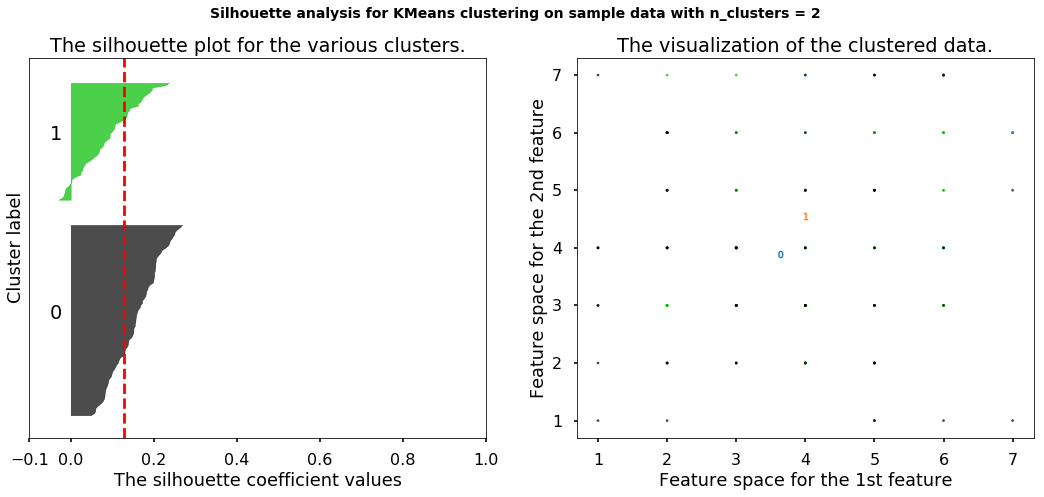





For n_clusters = 3 The average silhouette_score is : 0.11319819908846526


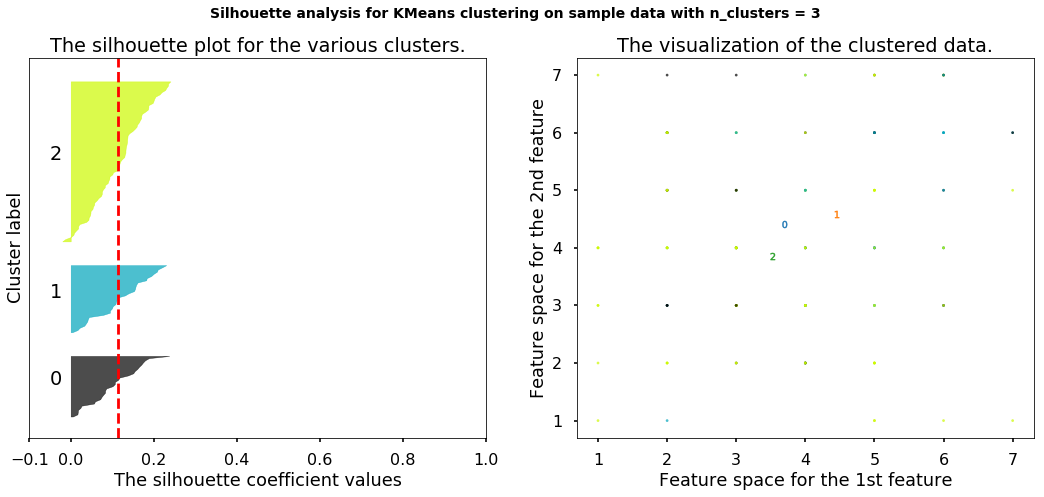





For n_clusters = 4 The average silhouette_score is : 0.10127237855514266


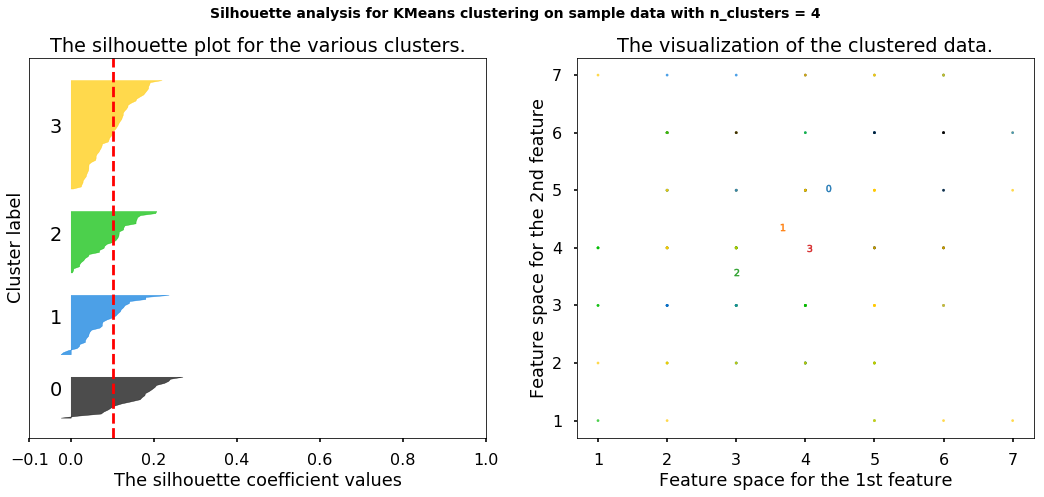





For n_clusters = 5 The average silhouette_score is : 0.0975489454039718


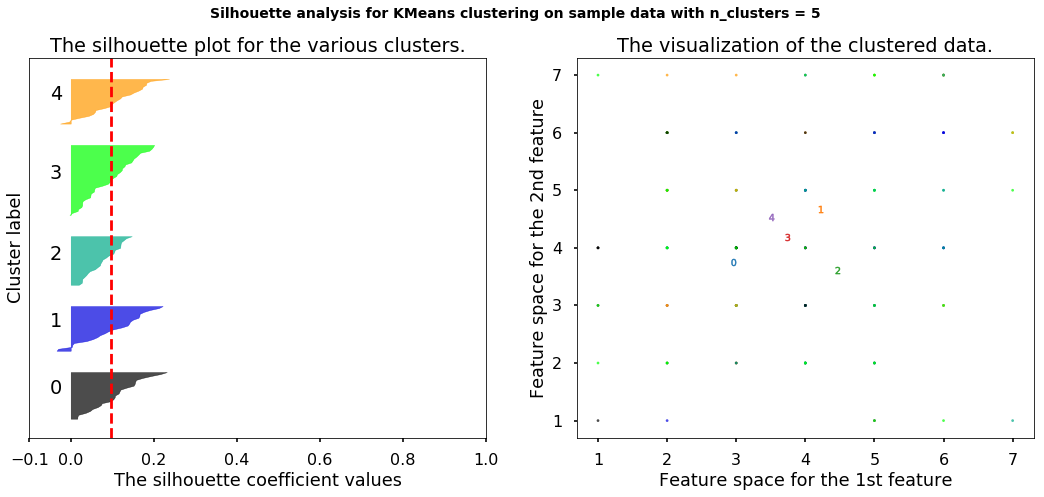





For n_clusters = 6 The average silhouette_score is : 0.09035691284336128


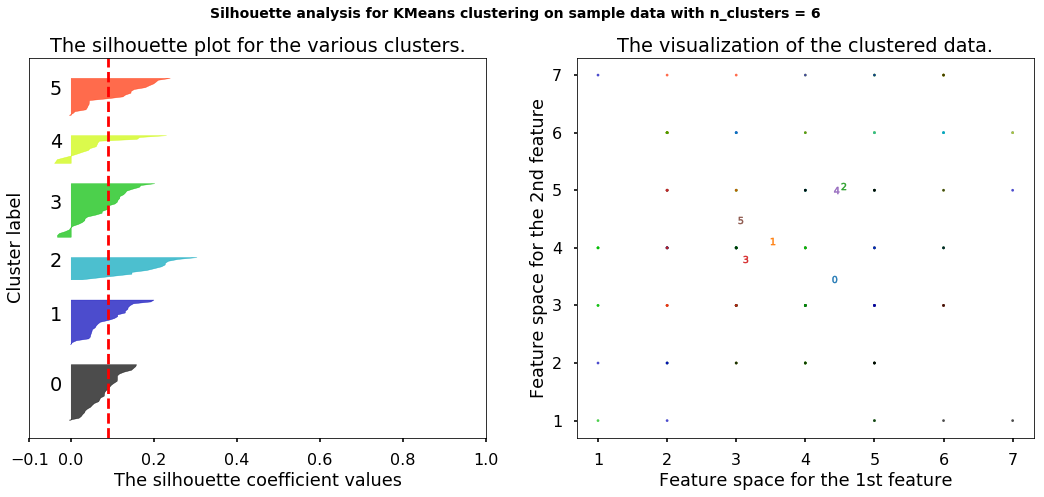





For n_clusters = 7 The average silhouette_score is : 0.09738288913918725


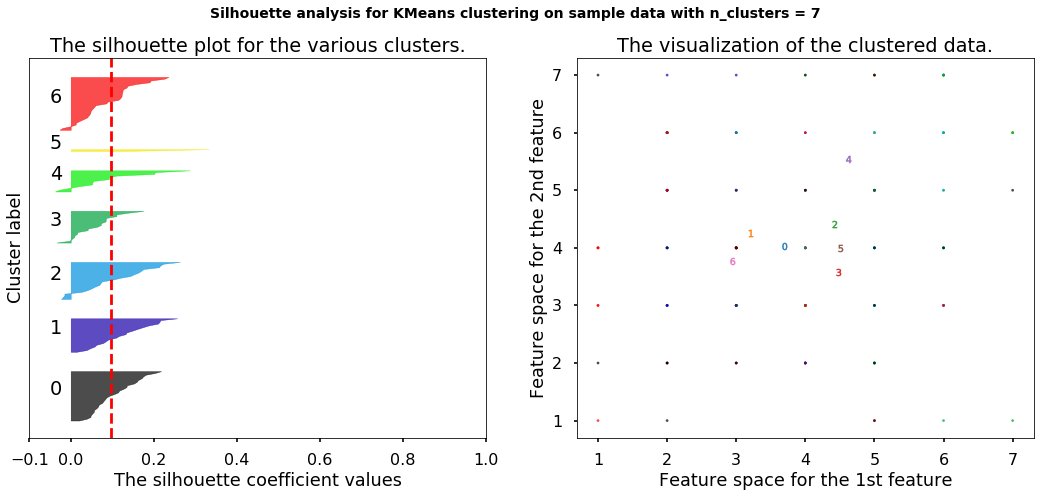





For n_clusters = 8 The average silhouette_score is : 0.09134804076631903


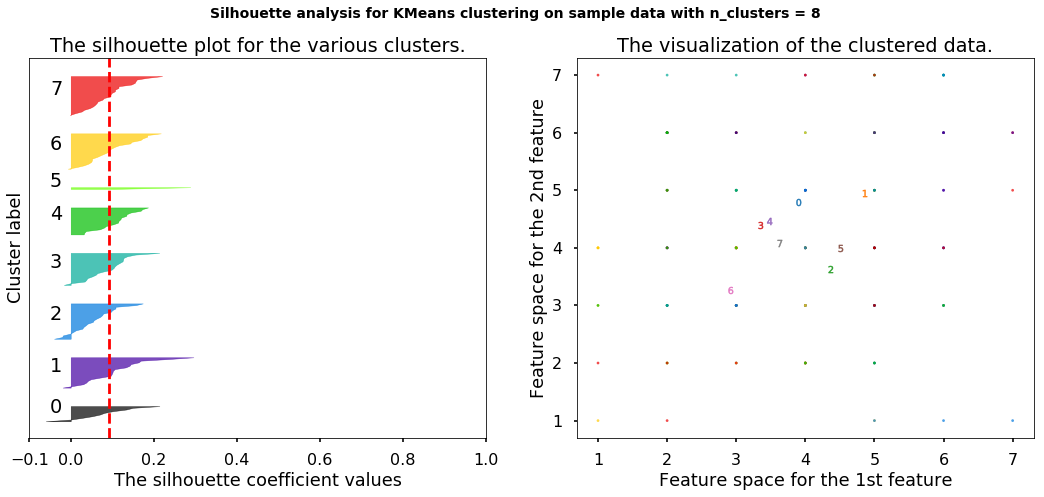





For n_clusters = 9 The average silhouette_score is : 0.08332200558953258


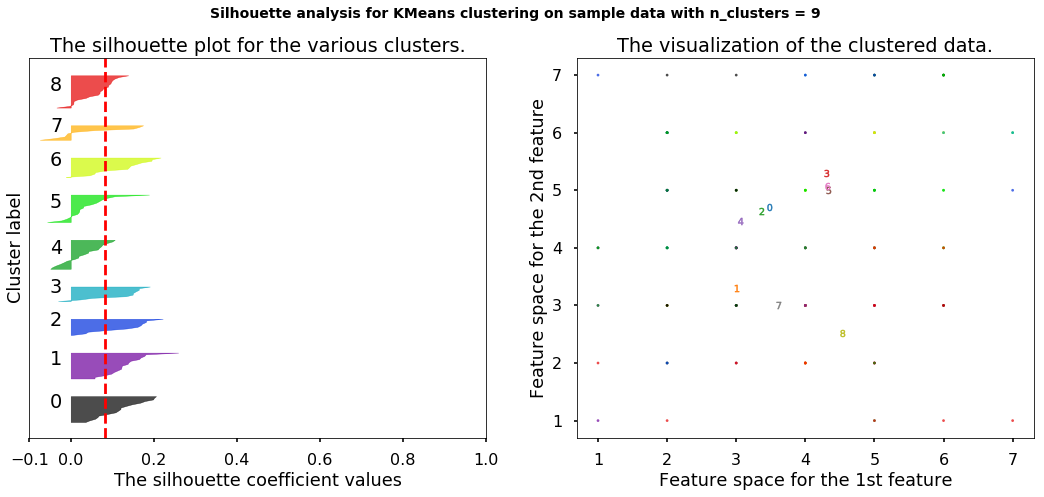





For n_clusters = 10 The average silhouette_score is : 0.08424673390580009


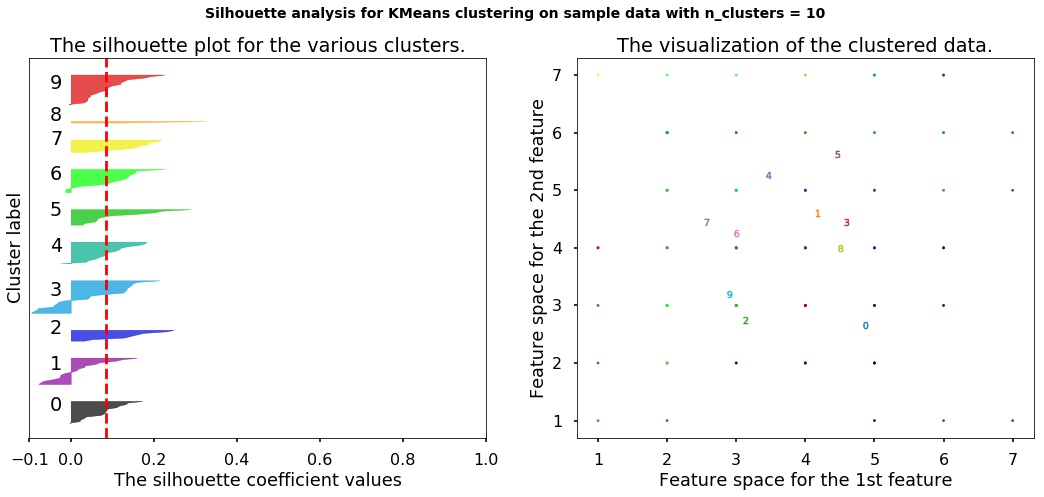





For n_clusters = 11 The average silhouette_score is : 0.0772910188406499


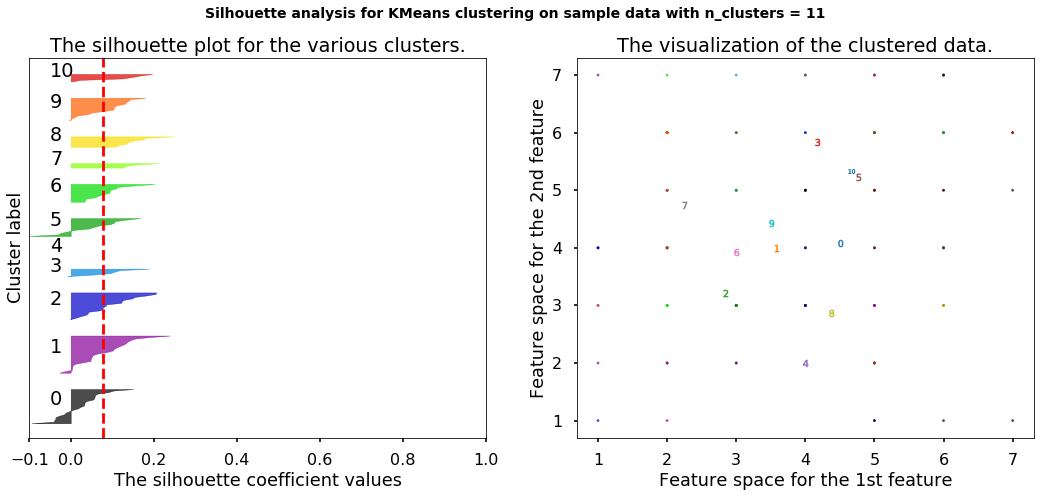





For n_clusters = 12 The average silhouette_score is : 0.08098800489170033


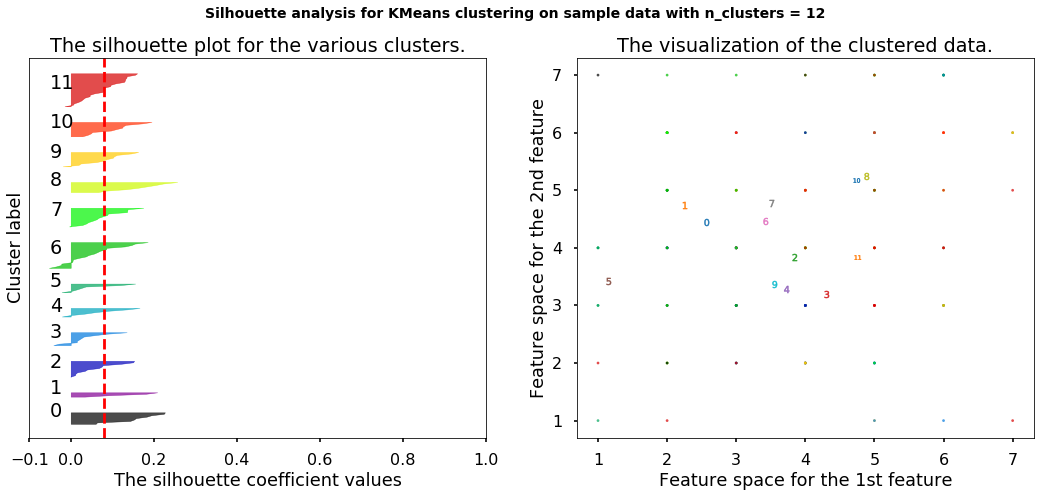





For n_clusters = 13 The average silhouette_score is : 0.06731087434935656


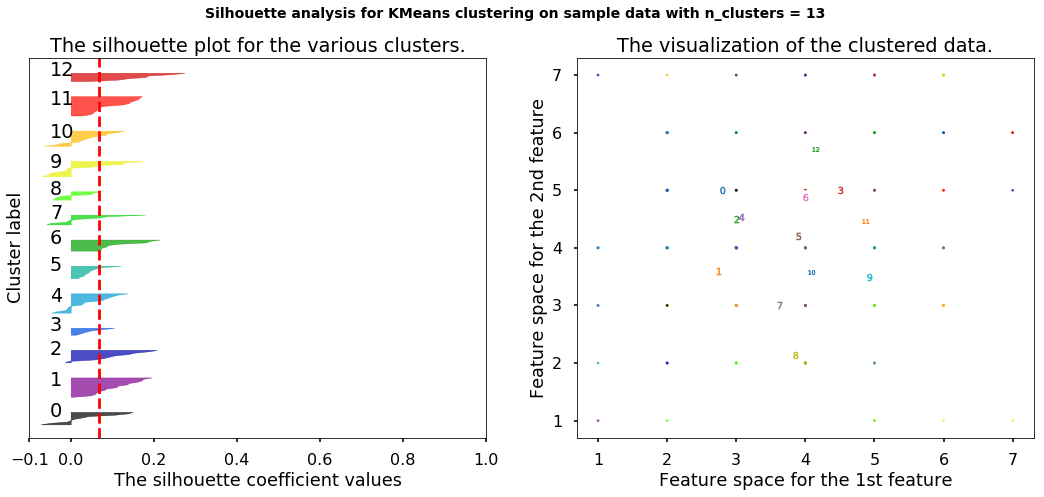





For n_clusters = 14 The average silhouette_score is : 0.07038909321138238


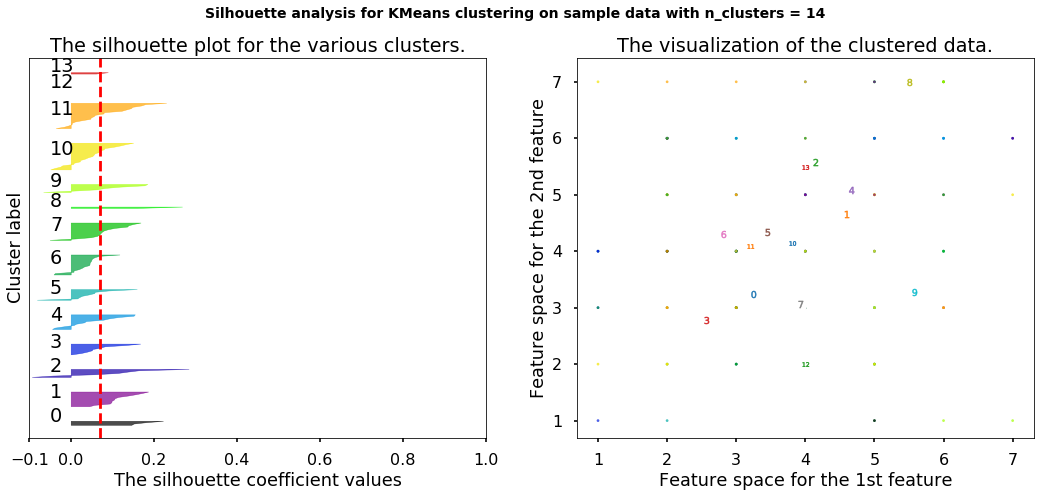





For n_clusters = 15 The average silhouette_score is : 0.06732154669532585


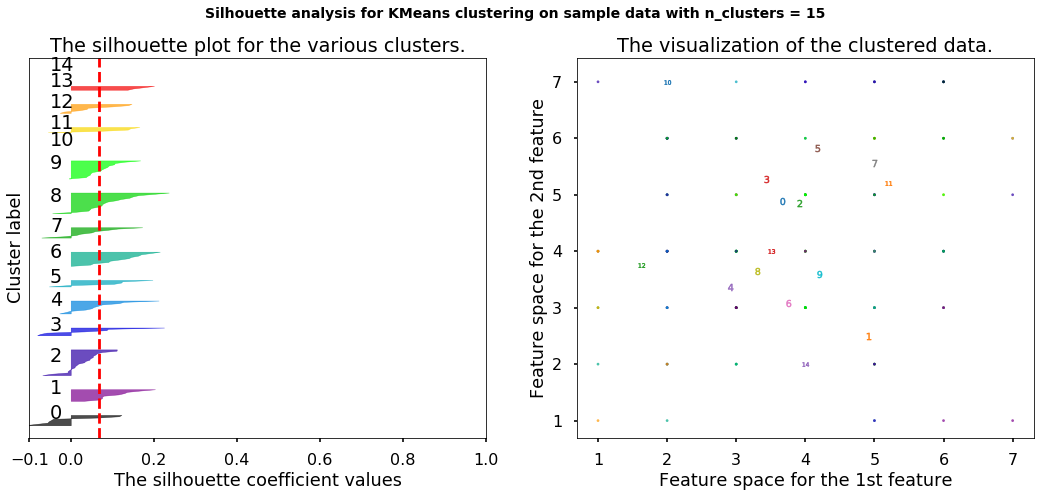





For n_clusters = 16 The average silhouette_score is : 0.07149091064191605


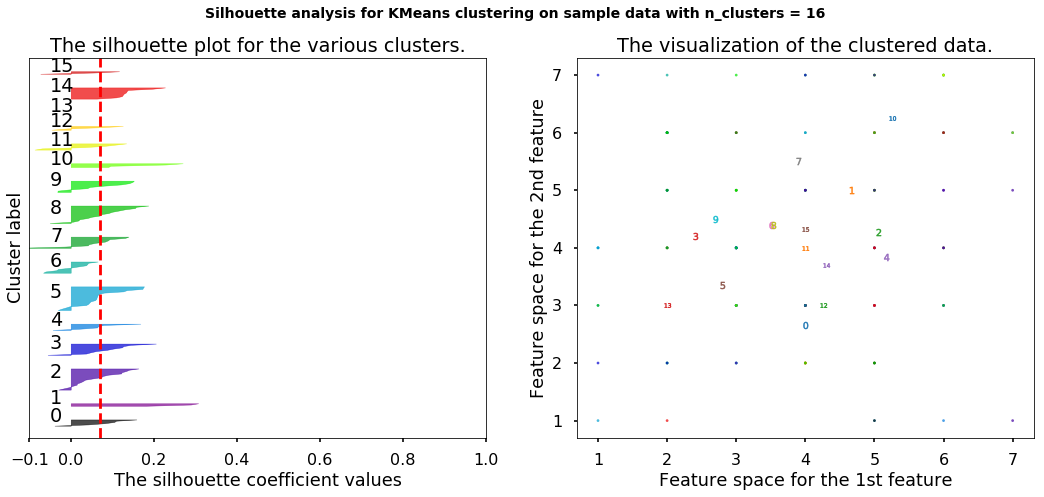

In [6]:
range_n_clusters = list(np.arange(2,17))
sils = {}

for n_clusters in range_n_clusters:
    print('\n\n\n')
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sils[str(n_clusters)] = silhouette_avg
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [7]:
sils

{'10': 0.08424673390580009,
 '11': 0.0772910188406499,
 '12': 0.08098800489170033,
 '13': 0.06731087434935656,
 '14': 0.07038909321138238,
 '15': 0.06732154669532585,
 '16': 0.07149091064191605,
 '2': 0.12880557632751155,
 '3': 0.11319819908846526,
 '4': 0.10127237855514266,
 '5': 0.0975489454039718,
 '6': 0.09035691284336128,
 '7': 0.09738288913918725,
 '8': 0.09134804076631903,
 '9': 0.08332200558953258}

In [14]:
from sklearn.cluster import KMeans

for i in range(2,13):
    km = KMeans(n_clusters=i).fit(X)
    preds = km.predict(X)
    score = silhouette_score(X, preds)
    print(i, score)

2 0.12880557632751155
3 0.1100894632319346
4 0.10107099536380104
5 0.08649863330528215
6 0.09736686749755172
7 0.07693834016699445
8 0.08215497481052422
9 0.09131604374309166
10 0.07668575901661663
11 0.07855466444346104
12 0.0790328651525116


In [28]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3).fit(X)
preds = gm.predict_proba(X)
preds = pd.DataFrame(preds)
preds[0] = round(preds[0], 3)
preds[1] = round(preds[1], 3)
preds[2] = round(preds[2], 3)

In [32]:
preds[(preds[0] > .03) & (preds[0] < .97)]

,0,1,2
48,0.041,0.0,0.959
66,0.965,0.0,0.035


In [33]:
preds[(preds[1] > .03) & (preds[1] < .97)]

,0,1,2
84,0.029,0.036,0.935


In [34]:
preds[(preds[2] > .03) & (preds[2] < .97)]

,0,1,2
48,0.041,0.000,0.959
66,0.965,0.000,0.035
84,0.029,0.036,0.935


In [ ]:
nice = data[(data.niceness > 12) | (data.im_shy == 7)].copy()

nice.shape

In [4]:
from sklearn.cluster import AffinityPropagation, KMeans

clf = AffinityPropagation()
clf.fit(data.select_dtypes(include=[np.number]))
labels = clf.labels_

#data['group'] = labels + 1

In [5]:
# http://blog.mailgun.com/machine-learning-for-everyday-tasks/

kdict = {}

for i in range(2,20):
    clf = KMeans(n_clusters=i)
    clf.fit(data.select_dtypes(include=[np.number]))
    labels = clf.labels_
    kdict[i] = clf.inertia_

kframe = pd.DataFrame([kdict]).transpose()
kframe.columns = ['ssd']

kframe['sum_ssd'] = np.cumsum(kframe['ssd'])

kframe['improvement'] = kframe['ssd']/kframe['sum_ssd']
kframe['sum_improvement'] = np.cumsum(kframe['improvement'])

kframe['improvement_improvement'] = kframe['improvement']/kframe['sum_improvement']
kframe

,ssd,sum_ssd,improvement,sum_improvement,improvement_improvement
2,6323.173993,6323.173993,1.000000,1.000000,1.000000
3,5841.794632,12164.968624,0.480215,1.480215,0.324422
4,5412.774074,17577.742698,0.307933,1.788148,0.172208
5,5122.306975,22700.049673,0.225652,2.013800,0.112053
6,4939.978249,27640.027922,0.178726,2.192525,0.081516
7,4769.339627,32409.367549,0.147159,2.339685,0.062897
8,4601.600833,37010.968381,0.124331,2.464015,0.050459
9,4440.899278,41451.867660,0.107134,2.571149,0.041668
10,4388.100271,45839.967930,0.095727,2.666876,0.035895
11,4267.581205,50107.549135,0.085168,2.752044,0.030947


In [ ]:
clf = AffinityPropagation()
clf.fit(data.select_dtypes(include=[np.number]))
labels = clf.labels_
set(labels)

In [ ]:
# For iris and other examples, they cut off the clusters once
# the line stops dropping sharply.
# Another option might be to cut it off where the improvement
# drops below 20 or 10%

(kframe['ssd']/kframe['ssd'].max()).plot()
kframe['improvement'].plot(color='red',
                           xticks=np.arange(2,20),                          
                          yticks=np.arange(0,1,.1))

In [ ]:
kframe['improvement_improvement'].plot(ylim=(0,0.15))

In [ ]:
clf = KMeans(n_clusters=4)
clf.fit(data.select_dtypes(include=[np.number]))
data['group'] = clf.labels_ + 1

In [ ]:
data['group'].value_counts()

In [ ]:
data.groupby('group').mean().transpose().sort_values(4)

In [ ]:
nice[nice.group == 1]

#4 goes in another group probably 13

In [ ]:
data.set_value(col='im_shy',
                   index=74, value=5)
data.set_value(col='group',
                   index=44, value=12)

data.head(1)

In [ ]:
data = data[data.im_shy < 6].copy()

In [ ]:
clf = AffinityPropagation()
clf.fit(data.select_dtypes(include=[np.number]))
labels = clf.labels_

data['group'] = labels + 1

In [ ]:
data.groupby('group').mean().transpose().sort_values(4)

In [ ]:
data[(data.group == 1)]

In [ ]:
data[(data.going_to_the_gym > 5) & (data.science > 6)]